# Работа с датасетом

In [ ]:
!wget https://archive.ics.uci.edu/static/public/850/raisin.zip

--2024-06-05 17:06:28--  https://archive.ics.uci.edu/static/public/850/raisin.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘raisin.zip.1’

raisin.zip.1            [ <=>                ] 111.99K   606KB/s    in 0.2s    

2024-06-05 17:06:28 (606 KB/s) - ‘raisin.zip.1’ saved [114677]



In [ ]:
!unzip raisin.zip
!unzip Raisin_Dataset.zip

Archive:  raisin.zip
replace Raisin_Dataset.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  Raisin_Dataset.zip
replace Raisin_Dataset/Raisin_Dataset.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Импортируем все необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [ ]:
raw_data = loadarff('Raisin_Dataset/Raisin_Dataset.arff')
df = pd.DataFrame(raw_data[0])

In [ ]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,b'Kecimen'
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,b'Kecimen'
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,b'Kecimen'
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,b'Kecimen'
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,b'Kecimen'


In [ ]:
#Рассмотрим размер датасета
df.shape

(900, 8)

In [ ]:
#Посмотрим типы
df.dtypes

Area               float64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea         float64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [ ]:
#Узнаем, есть ли какие-то еще классы
df['Class']!=	b'Kecimen'

0      False
1      False
2      False
3      False
4      False
       ...  
895     True
896     True
897     True
898     True
899     True
Name: Class, Length: 900, dtype: bool

In [ ]:
#Уточним какие именно уникальные классы есть
df['Class'].unique()

array([b'Kecimen', b'Besni'], dtype=object)

## Преобразуем наши категориальные данные

In [ ]:
le = LabelEncoder()
df["Class"]= le.fit_transform(df["Class"])
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,1


In [ ]:
df['Class'].unique()

array([1, 0])

In [ ]:
#Узнаем, есть ли пропуски в данных
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

# Построение графиков для понимания структуры данных

## Парные диаграммы

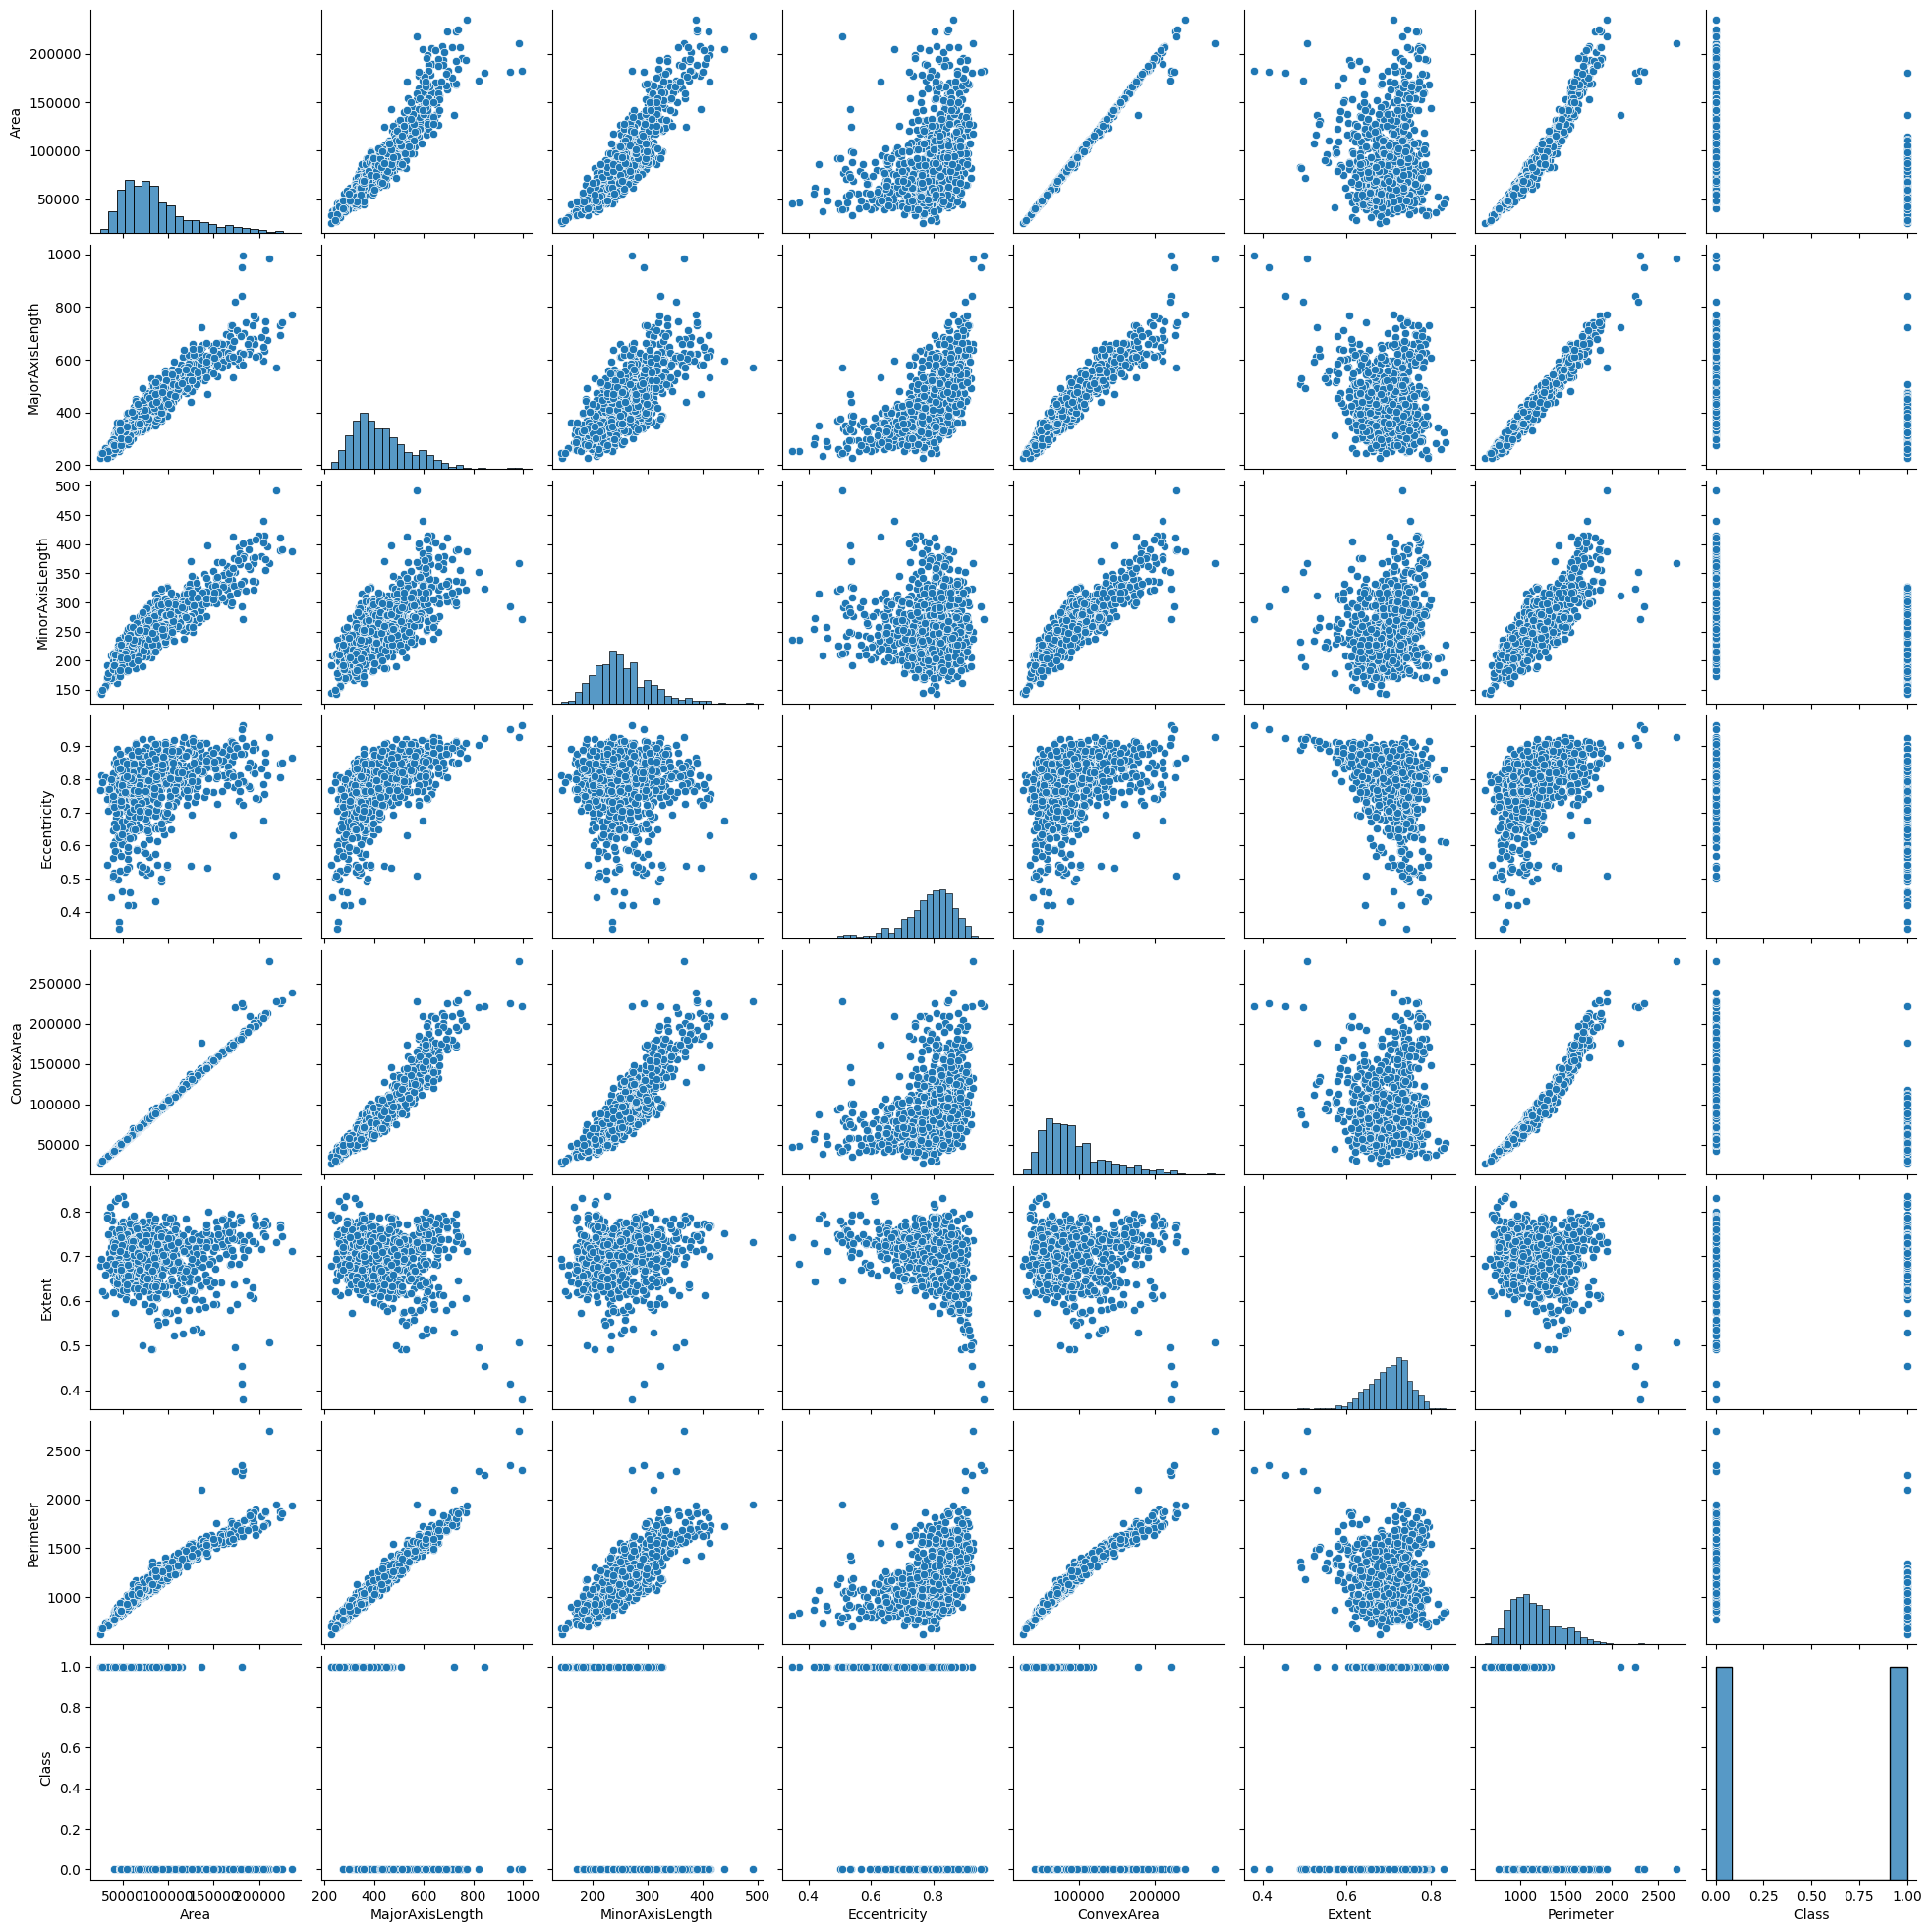

In [ ]:
#Парные диаграммы
sns.pairplot(df)

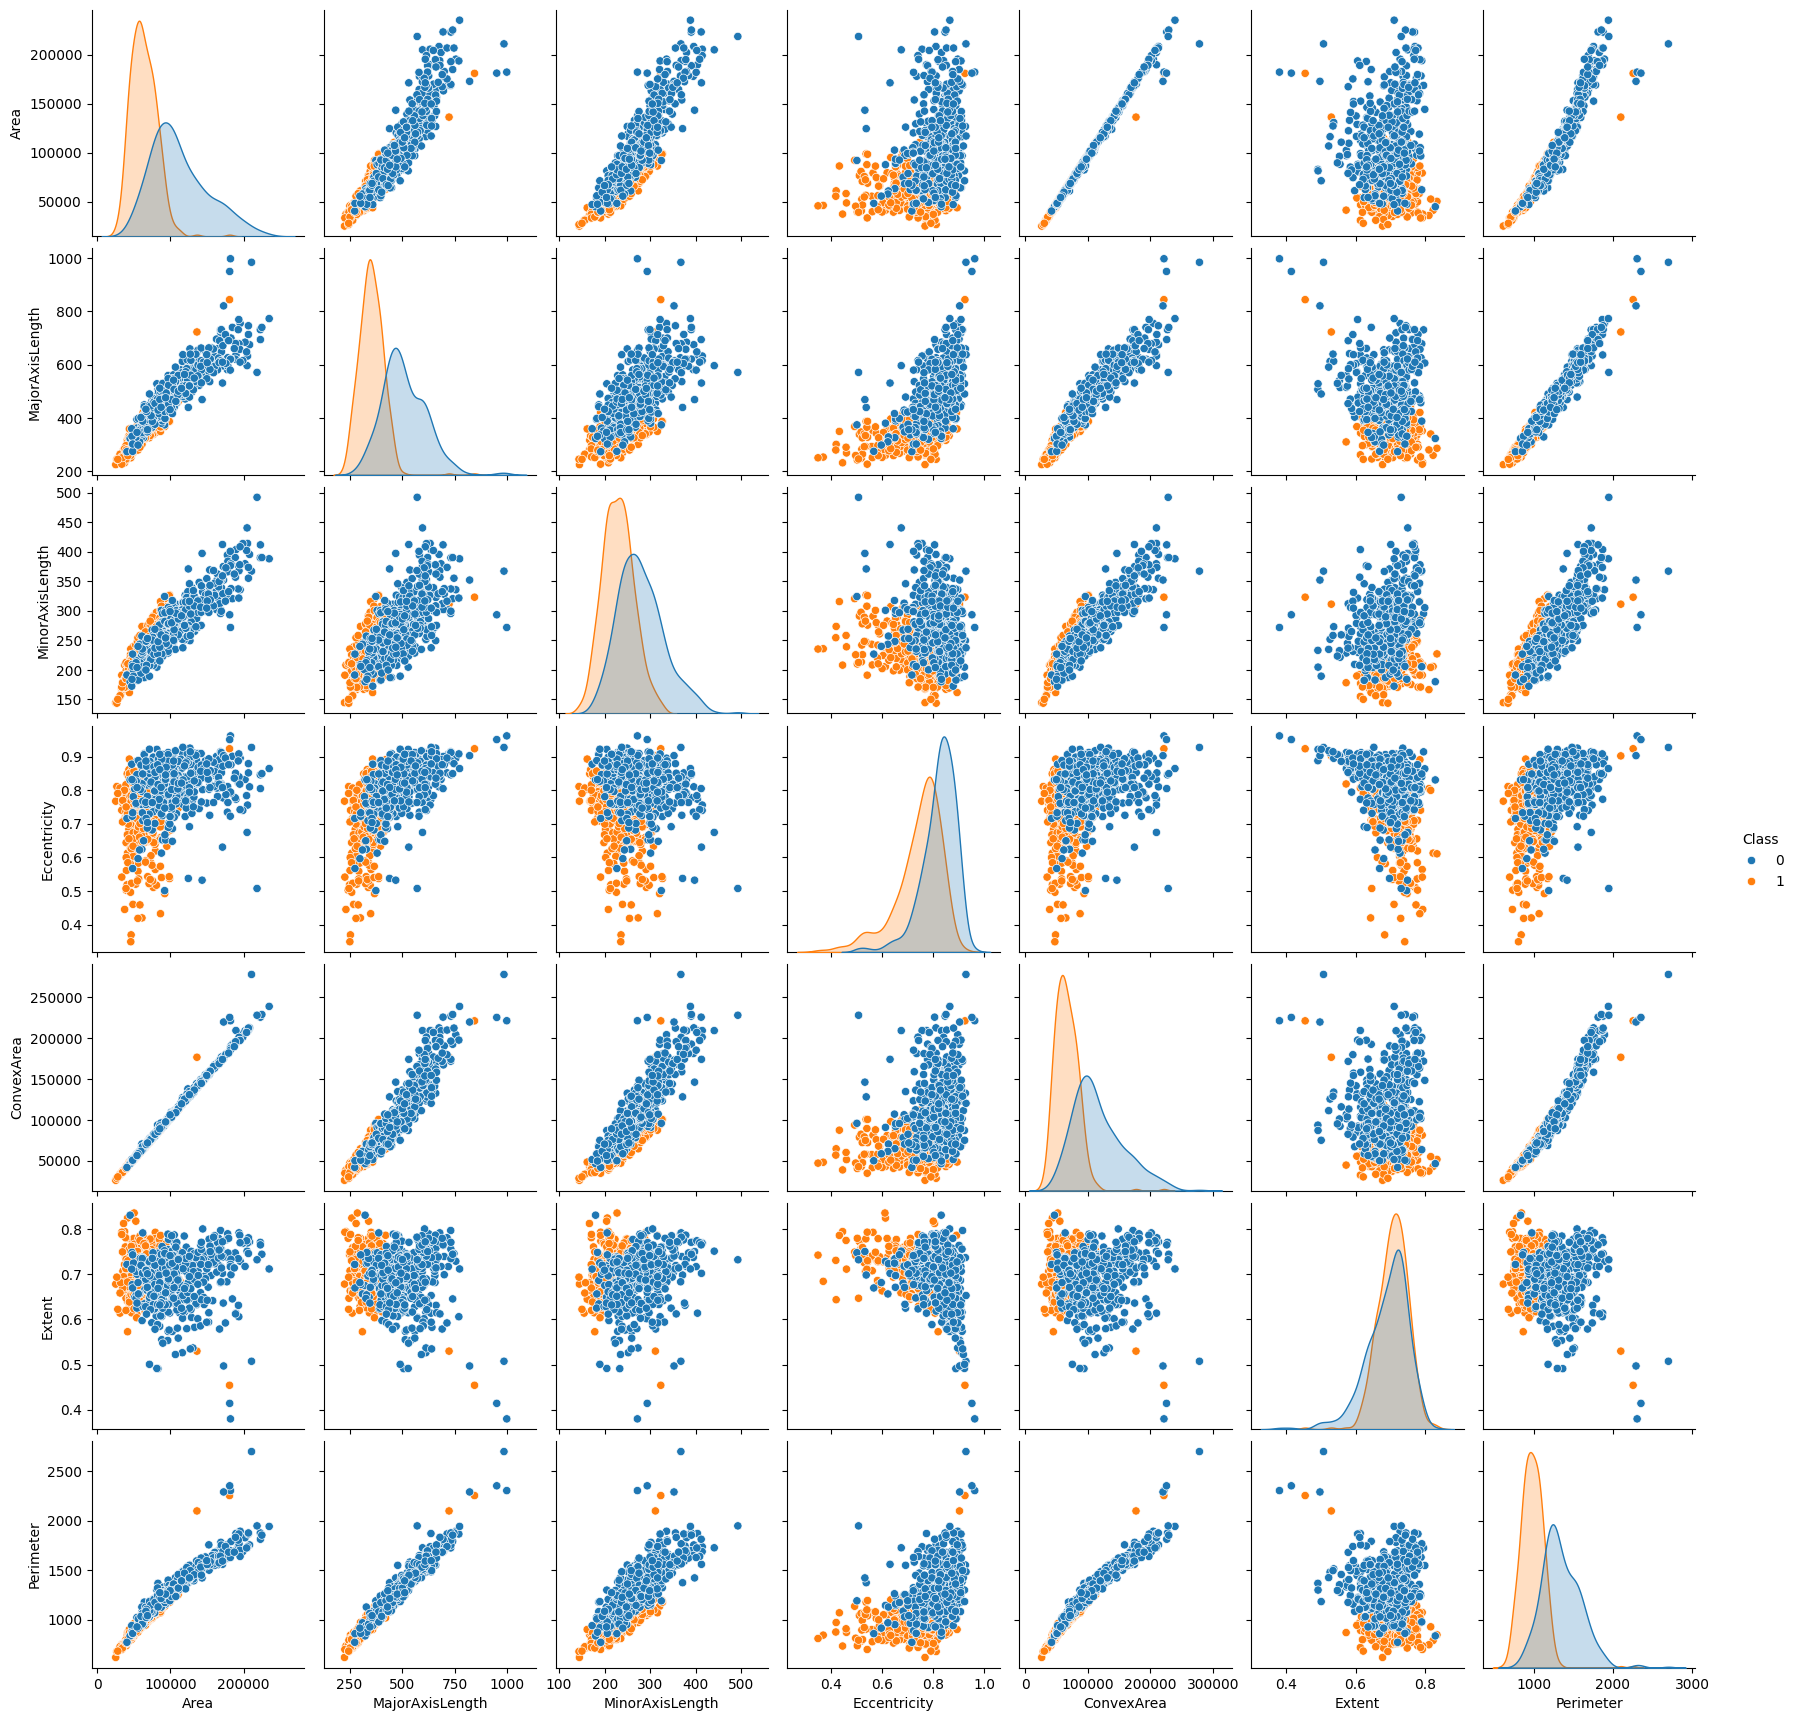

In [ ]:
sns.pairplot(df, hue="Class")

## Оценим дисбаланс классов в Class

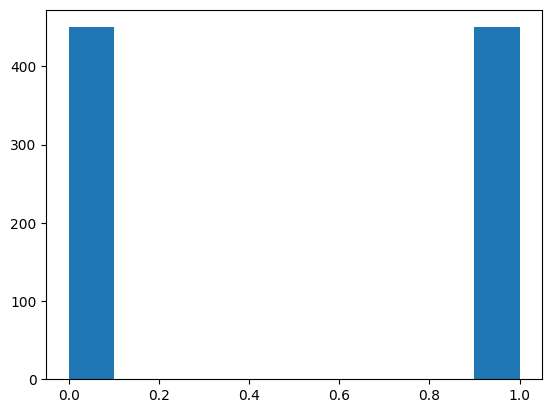

In [ ]:
plt.hist(df['Class'])
plt.show()

In [ ]:
df['Class'].value_counts()

Class
1    450
0    450
Name: count, dtype: int64

Дисбаланс классов в нашем датасете отсутствует.

## Оценим числовые данные при помощи скрипичных диаграмм

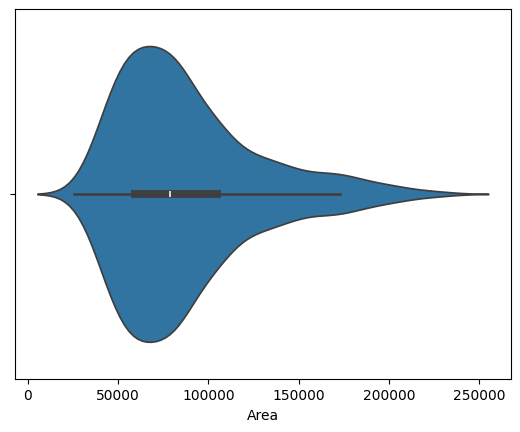

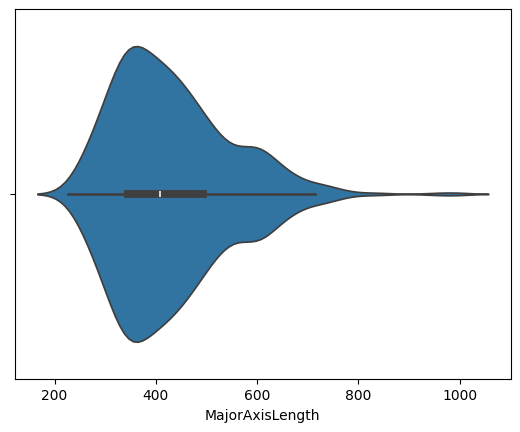

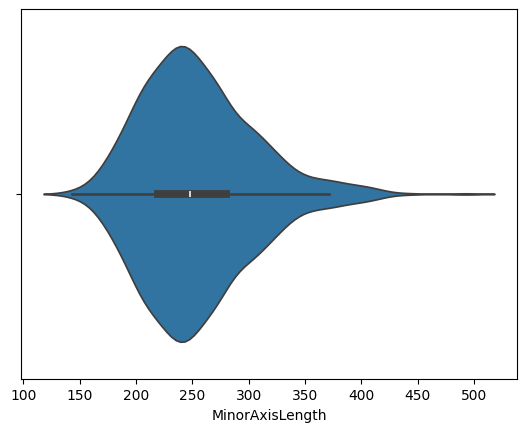

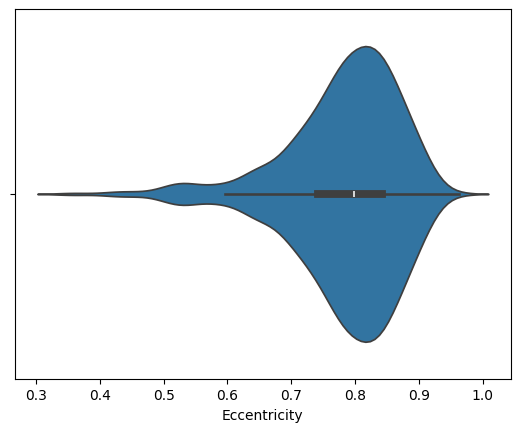

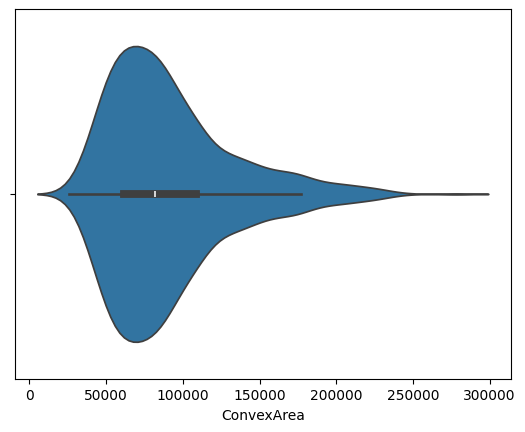

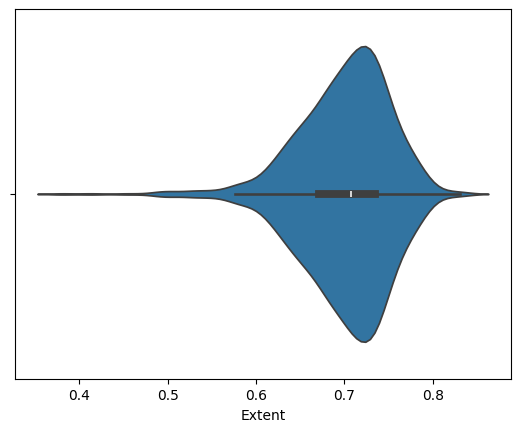

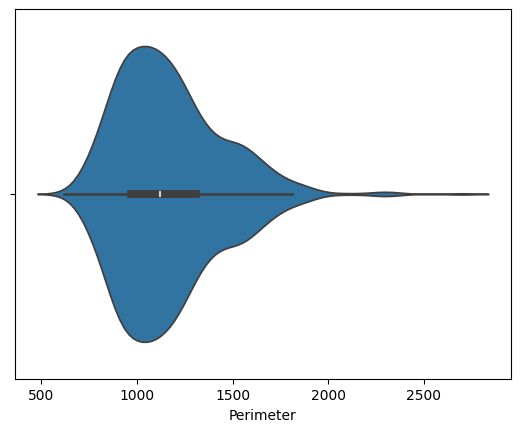

In [ ]:
# Скрипичные диаграммы для числовых колонок
for col in ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']:
    sns.violinplot(x=df[col])
    plt.show()

# Масштабирование данные

MinMax масштабирование

In [ ]:
scale_cols = list(df.columns)
scale_cols.pop()
scale_cols

['Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'ConvexArea',
 'Extent',
 'Perimeter']

In [ ]:
mms = MinMaxScaler()
df_mms = mms.fit_transform(df[scale_cols])

In [ ]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    df[new_col_name] = df_mms[:,i]

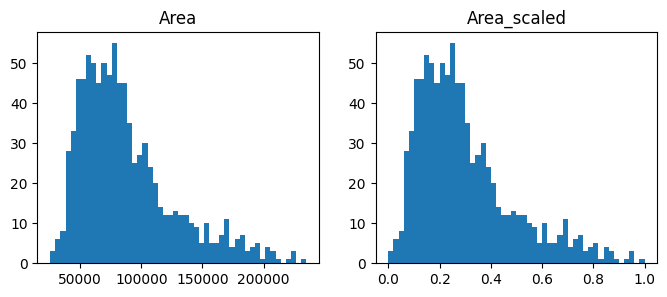

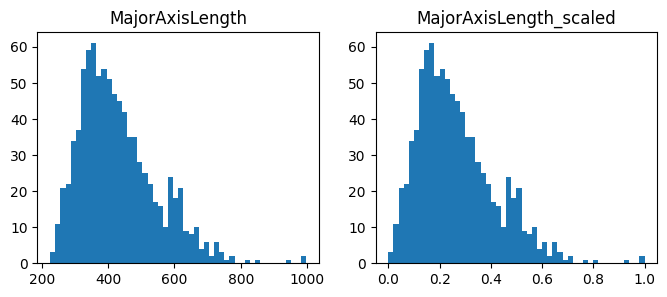

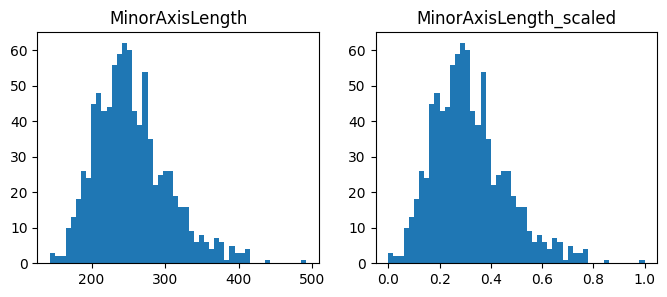

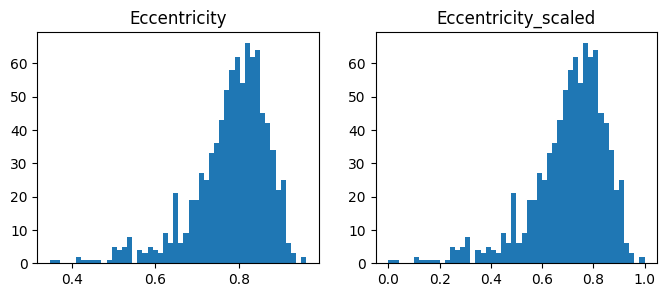

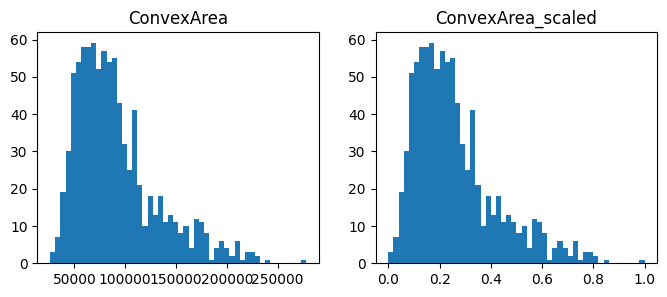

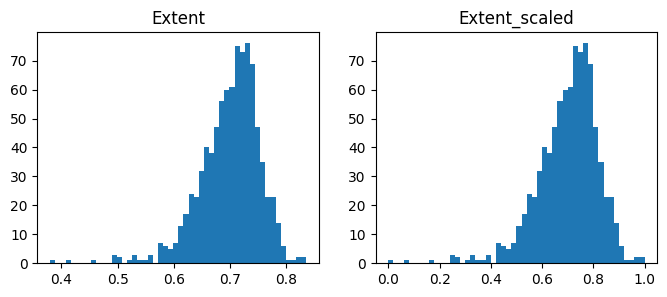

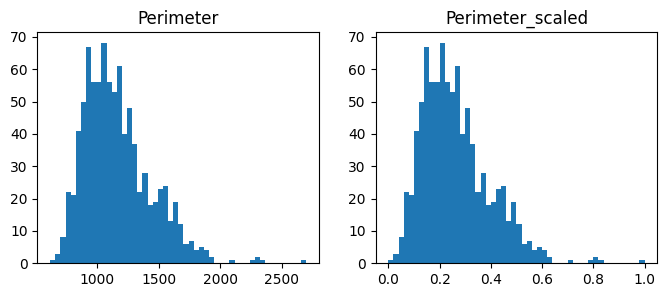

In [ ]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(df[col], 50)
    ax[1].hist(df[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных

In [ ]:
df.drop(scale_cols,axis=1,inplace=True)

<Axes: >

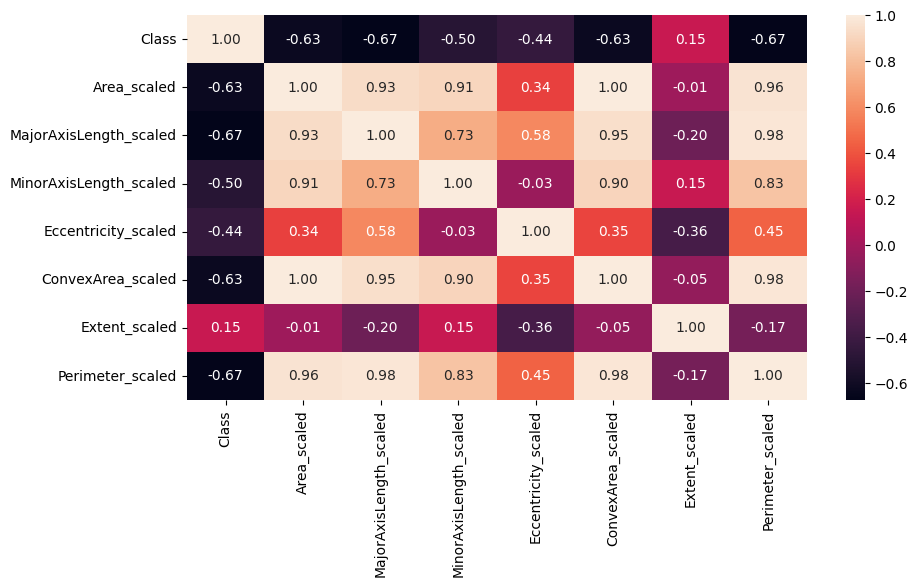

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Целевой признак классификации "Class" наиболее сильно коррелирует с Perimeter (-0.67), MajorAxisLength (-0.67) и Area (-0.63). Эти признаки обязательно следует оставить в модели классификации.

Признаки Area, ConvexArea и Perimeter имеют корреляцию, близкую по модулю к 1, поэтому оба признака Area и ConvexArea не следует включать в модели.

Будем использовать признак Perimeter, так как он лучше коррелирует с целевым признаком классификации.

# Выбор метрик для последующей оценки качества моделей

Для оценки качества моделей будем использовать метрики: accuracy, recall и f-меру.

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров

In [ ]:
clf_models = {
              "LogisticRegression":LogisticRegression(solver='saga'),
              "SVC":SVC(probability=True),
              "DecisionTree":DecisionTreeClassifier(),
              "GradientBoosting":GradientBoostingClassifier(),
              "RandomForest":RandomForestClassifier(),}

In [ ]:
clf_metrics = {"Accuracy":accuracy_score,
               "Recall":recall_score,
               "F1":f1_score}

# Выбор наиболее подходящих моделей для решения задачи

### Разделим выборку на обучающую и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class",axis=1), df["Class"], test_size=0.33, random_state=42)

In [ ]:
for clf in clf_models.values():
    clf.fit(X_train,y_train)

#Оценим качество моделей

In [ ]:
df_metrics = pd.DataFrame(columns=["Model Name","Accuracy","Recall","F1"])
i = 0

In [ ]:
for name,clf in clf_models.items():
    print(f"{name}:")
    print('\t',f"accuracy = {accuracy_score(y_test,clf.predict(X_test))}")
    print('\t',f"recall = {recall_score(y_test,clf.predict(X_test))}")
    print('\t',f"f1 = {f1_score(y_test,clf.predict(X_test))}")
    y_pred = clf.predict(X_test)
    df_metrics.loc[i] = [name,accuracy_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)]
    i += 1

LogisticRegression:
	 accuracy = 0.48484848484848486
	 recall = 0.0
	 f1 = 0.0
SVC:
	 accuracy = 0.8417508417508418
	 recall = 0.8823529411764706
	 f1 = 0.8517350157728706
DecisionTree:
	 accuracy = 0.7676767676767676
	 recall = 0.7254901960784313
	 f1 = 0.7628865979381443
GradientBoosting:
	 accuracy = 0.8552188552188552
	 recall = 0.8496732026143791
	 f1 = 0.858085808580858
RandomForest:
	 accuracy = 0.8451178451178452
	 recall = 0.8300653594771242
	 f1 = 0.8466666666666667


# Подбор гиперпараметров для выбранных моделей

In [ ]:
param_ams = {'n_estimators':[100,150,200],'max_depth':[3,4,5,6,7,8]}
tree_param = {'max_depth':[3,4,5,6,7,8]}
params_svc = {'kernel':['rbf', 'sigmoid']}
lr = {'penalty':['l1', 'l2', 'elasticnet']}

In [ ]:
clf_models_optim = {  "LogisticRegression":GridSearchCV(clf_models["LogisticRegression"], lr,scoring='f1'),
                      "SVC":GridSearchCV(clf_models["SVC"], params_svc,scoring='f1'),
                      "DecisionTree":GridSearchCV(clf_models["DecisionTree"], tree_param,scoring='f1'),
                      "GradientBoosting":GridSearchCV(clf_models["GradientBoosting"], param_ams,scoring='f1'),
                     "RandomForest":GridSearchCV(clf_models["RandomForest"], param_ams,scoring='f1'),
                     }


In [ ]:
X = df.drop("Class",axis=1)
y = df["Class"]

In [ ]:
for clf in tqdm(clf_models_optim.values()):
    clf.fit(X,y)

100%|██████████| 5/5 [02:39<00:00, 32.00s/it]


In [ ]:
for name,clf in clf_models_optim.items():
    print(f"{name}:")
    print('\t',f"accuracy = {accuracy_score(y_test,clf.predict(X_test))}")
    print('\t',f"recall = {recall_score(y_test,clf.predict(X_test))}")
    print('\t',f"f1 = {f1_score(y_test,clf.predict(X_test))}")
    y_pred = clf.predict(X_test)
    df_metrics.loc[i] = [name,accuracy_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)]
    i += 1


LogisticRegression:
	 accuracy = 0.48484848484848486
	 recall = 0.0
	 f1 = 0.0
SVC:
	 accuracy = 0.8383838383838383
	 recall = 0.8888888888888888
	 f1 = 0.85
DecisionTree:
	 accuracy = 0.8552188552188552
	 recall = 0.8235294117647058
	 f1 = 0.8542372881355933
GradientBoosting:
	 accuracy = 0.9932659932659933
	 recall = 1.0
	 f1 = 0.9935064935064934
RandomForest:
	 accuracy = 0.9494949494949495
	 recall = 1.0
	 f1 = 0.9532710280373832


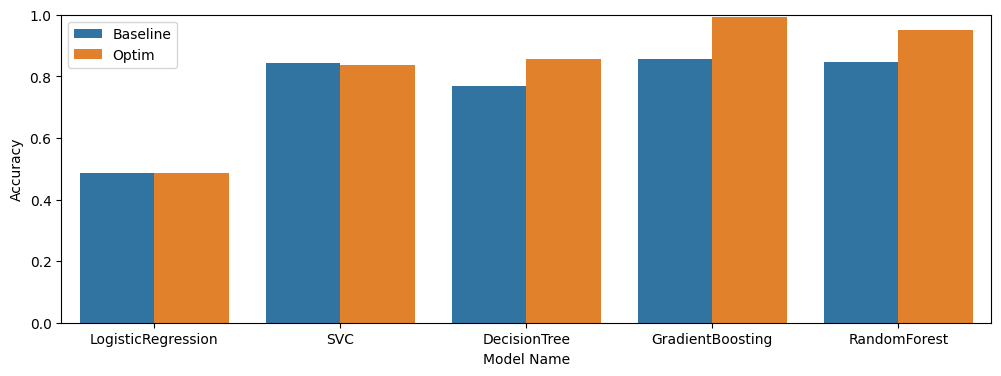

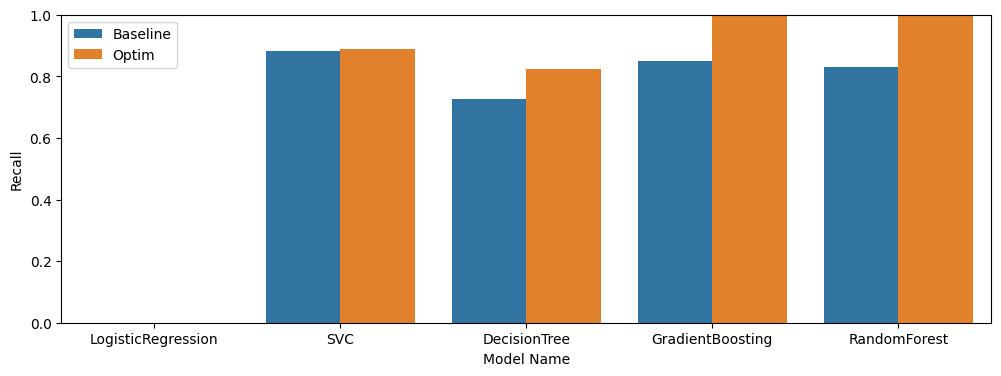

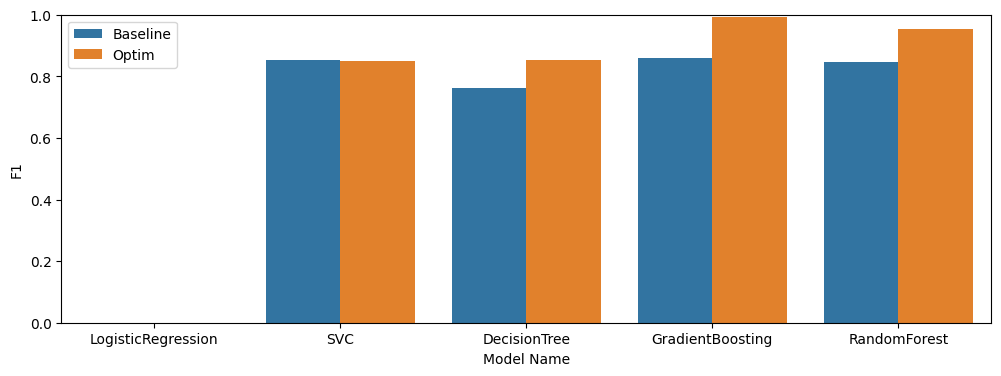

In [ ]:
for name in ["Accuracy","Recall","F1"]:
    plt.figure(figsize=(12,4))
    pl = sns.barplot(data=df_metrics,y=name,x='Model Name',hue=['Baseline']*5+["Optim"]*5,legend='full',dodge=True)
    pl.set_ylim(0,1)